In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import acquire
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
np.random.seed(123)

In [26]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [27]:
def prep_titanic(df):
    df = df[(df.age.notna()) & (df.embarked.notna())]
    df = df.drop(columns=['deck', 'passenger_id', 'class'])
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], prefix=['sex', 'embark'])
    df = pd.concat([df, dummy_df.drop(columns=['sex_male'])], axis=1)
    df = df.drop(columns=['sex', 'embark_town']) 
    df = df.rename(columns={"sex_female": "is_female"})
    return df

In [28]:
df = acquire.get_titanic_data()

In [29]:
titanic = prep_titanic(df)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [30]:
#1. I predict that those that went alone are more likely to have not survived
x = titanic[['alone', 'is_female', 'embark_Southampton']]
y = titanic.survived

x_train_and_validate, x_test, y_train_and_validate, y_test = train_test_split(x, y, random_state=123, test_size=.3)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [8]:
x_train.head()

,alone,is_female,embark_Southampton
678,0,1,1
789,1,0,0
763,0,1,1
246,1,1,1
378,1,0,0


In [9]:
y_train.value_counts()

0    246
1    152
Name: survived, dtype: int64

In [10]:
tree = DecisionTreeClassifier(max_depth = 2)

In [11]:
#2.
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- is_female <= 0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- class: 0
|   |--- embark_Southampton >  0.50
|   |   |--- class: 0
|--- is_female >  0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- class: 1
|   |--- embark_Southampton >  0.50
|   |   |--- class: 1



In [12]:
#3.
tree.predict(x_train)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [13]:
predictions = tree.predict(x_train)
actual = y_train

In [14]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,204,42
1,45,107


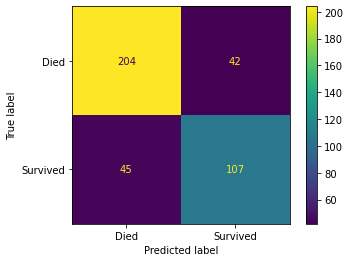

In [15]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['Died', 'Survived'])

In [16]:
#4.
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       246
           1       0.72      0.70      0.71       152

    accuracy                           0.78       398
   macro avg       0.77      0.77      0.77       398
weighted avg       0.78      0.78      0.78       398



In [17]:
#5.
tree = DecisionTreeClassifier(max_depth = None)
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- is_female <= 0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 0
|   |   |--- alone >  0.50
|   |   |   |--- class: 0
|   |--- embark_Southampton >  0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 0
|   |   |--- alone >  0.50
|   |   |   |--- class: 0
|--- is_female >  0.50
|   |--- embark_Southampton <= 0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 1
|   |   |--- alone >  0.50
|   |   |   |--- class: 1
|   |--- embark_Southampton >  0.50
|   |   |--- alone <= 0.50
|   |   |   |--- class: 1
|   |   |--- alone >  0.50
|   |   |   |--- class: 1



In [18]:
tree.predict(x_train)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [19]:
predictions = tree.predict(x_train)
actual = y_train

In [20]:
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,204,42
1,45,107


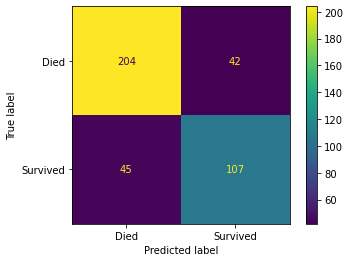

In [21]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['Died', 'Survived'])

In [22]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       246
           1       0.72      0.70      0.71       152

    accuracy                           0.78       398
   macro avg       0.77      0.77      0.77       398
weighted avg       0.78      0.78      0.78       398



In [103]:
#6. The one with greater depth had the better results

In [24]:
#7.
x_validate

,alone,is_female,embark_Southampton
504,1,1,1
677,1,1,1
574,1,0,1
89,1,0,1
448,0,1,0
34,0,0,0
579,1,0,1
238,1,0,1
856,0,1,1
882,1,1,1


In [150]:
#1.
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [151]:
def prep_telco(telco):
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco

In [152]:
df = prep_telco(df)

In [153]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [154]:
x = train[['streaming_tv_Yes', 'streaming_movies_Yes']]
y = train.senior_citizen

x_train_and_validate, x_test, y_train_and_validate, y_test = train_test_split(x, y, random_state=123, test_size=.3)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [155]:
tree = DecisionTreeClassifier(max_depth = 1)

In [156]:
tree.fit(x_train, y_train)

print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- streaming_movies_Yes <= 0.50
|   |--- class: 0
|--- streaming_movies_Yes >  0.50
|   |--- class: 0



In [157]:
tree.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
predictions = tree.predict(x_train)
actual = y_train

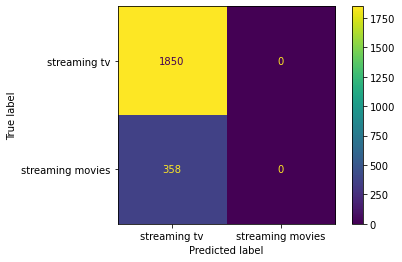

In [159]:
plot_confusion_matrix(tree, x_train, y_train, display_labels=['streaming tv', 'streaming movies'])